<a href="https://colab.research.google.com/github/madhesh-sri/House-price-pre/blob/main/House_price_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

UPLOAD DATASET

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

Saving Housing.csv to Housing.csv


DATA EXPLORATION

In [17]:
# Read the uploaded CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the actual name of the uploaded file
df = pd.read_csv(next(iter(uploaded)))

# Display the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


DESCRIBE

In [ ]:
# Get descriptive statistics of the DataFrame
description = df.describe()

# Display the summary statistics
print(description)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


DATA CLEANING

MISSING VALUE

In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the missing values per column
print(missing_values)

# Optionally, you can visualize the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


DUPLICATE

In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows themselves
print("\nDuplicate rows:\n")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


ENCODING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files


# Handle categorical variables with One-Hot Encoding
df_encoded = pd.get_dummies(df)

# Define features and target
# Automatically detect the target as the last column (or set manually if known)
X = df_encoded.iloc[:, :-1]  # All columns except the last
y = df_encoded.iloc[:, -1]   # Last column as target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Squared Error (MSE): 0.00
R² Score: 1.00


MODEL

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.00


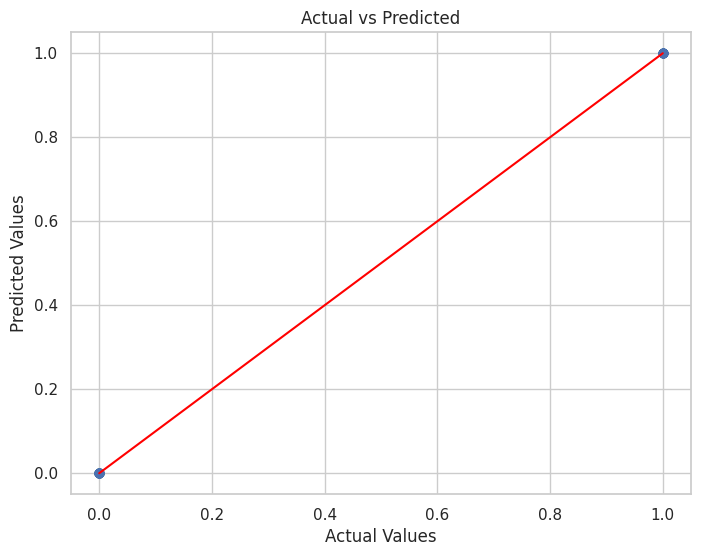

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are already defined from model prediction

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files



#  Basic data cleaning (drop rows with missing values)
df.dropna(inplace=True)

#  One-hot encode categorical variables
df_encoded = pd.get_dummies(df)

#  Define features and target
# Replace 'Price' with your actual target column if different
target_column = 'Price'


# : Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# : Predict
y_pred = model.predict(X_test)

In [15]:
#  Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.00


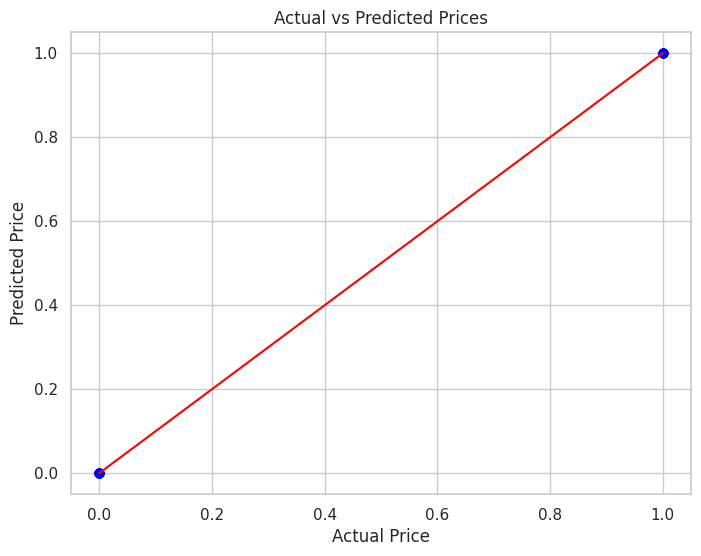

In [ ]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve visual style
sns.set(style="whitegrid")

HISTOGRAM

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


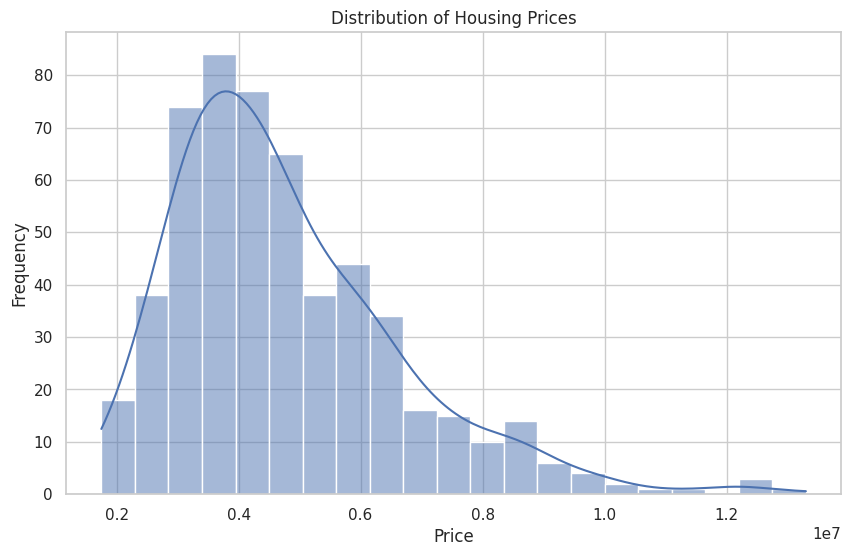

In [ ]:
# Print the column names to verify the existence and spelling of 'Price'
print(df.columns)

# Then proceed with the visualization once you confirm the correct column name
plt.figure(figsize=(10,6))
# Replace 'Price' below with the actual name of the price column from the output of df.columns
# Use the correct column name based on the output of df.columns
sns.histplot(df['price'], kde=True) # Assuming 'price' is the correct column name from the global variable output
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

SCATTER PLOT

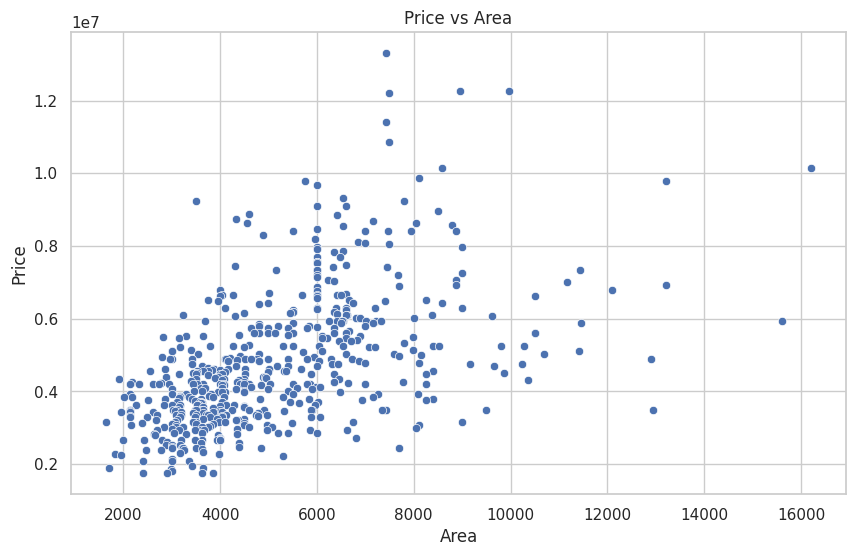

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
# **IMPORTANT:** Replace 'Area' and 'Price' below with the exact column names from the output of print(df.columns)
# For example, if the output showed ['...','area', 'price', '...'], use sns.scatterplot(x='area', y='price', data=df)
# Assuming from the previous cell's comment that 'price' (lowercase) might be the target column name,
# and assuming 'Area' should also be lowercase based on common naming conventions.
sns.scatterplot(x='area', y='price', data=df) # Changed to lowercase 'area' and 'price' based on common potential issue
plt.title('Price vs Area')
plt.xlabel('Area') # You can keep the label capitalized for readability in the plot
plt.ylabel('Price') # You can keep the label capitalized for readability in the plot
plt.show()